<div class="notebook-buttons" style="display:flex; padding-top: 5rem;padding-bottom: 2.5rem;line-height: 2.15;">
    <a href="https://colab.research.google.com/github/magdasalatka/fantasticfeatures/blob/main/transformations.ipynb">
        <div id="colab-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; align-items: center;">
            <img class="call-to-action-img" src="img/colab.svg" width="30" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">Run in Google Colab</div>
        </div>
    </a>
    <a href="https://raw.githubusercontent.com/magdasalatka/fantasticfeatures/main/transformations.ipynb" download>
        <div id="download-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; height: auto;align-items: center;">
            <img class="call-to-action-img" src="img/download.svg" width="22" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">Download Notebook</div>
        </div>
    </a>
    <a href="https://github.com/magdasalatka/fantasticfeatures/blob/main/transformations.ipynb">
        <div id="github-link" style="display: flex;padding-right: 3.5rem;padding-bottom: 0.625rem;border-bottom: 1px solid #ececed; height: auto;align-items: center;">
            <img class="call-to-action-img" src="img/github.svg" width="25" height="30" style="margin-right: 10px;margin-top: auto;margin-bottom: auto;">
            <div class="call-to-action-txt">View on GitHub</div>
        </div>
    </a>
</div>

# Back to the Feature - Transformations and statistical feature engineering

by [Teresa Kubacka](http://teresa-kubacka.com/), [Magdalena Surówka](https://datali.ch)

AMLD 2021, 26.10.2021

In [ ]:
!pip install -U git+https://github.com/magdasalatka/fantasticfeatures.git

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics as sg
import matplotlib.pyplot as plt
from scipy import stats

from fantasticfeatures.plotting import train_and_diagnose, plot_x_vs_y, plot_multiple_x_vs_y, train_xy
from fantasticfeatures.dataset_noise_generator import data_to_df

C:\Users\TK\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Transformations
* Logarithmic transformation - np.log(X)
* Reciprocal transformation - 1 / X
* Square root transformation - X**(1/2)
* Exponential transformation (more general, you can use any exponent)
* Box-Cox transformation
* Yeo-Johnson transformation


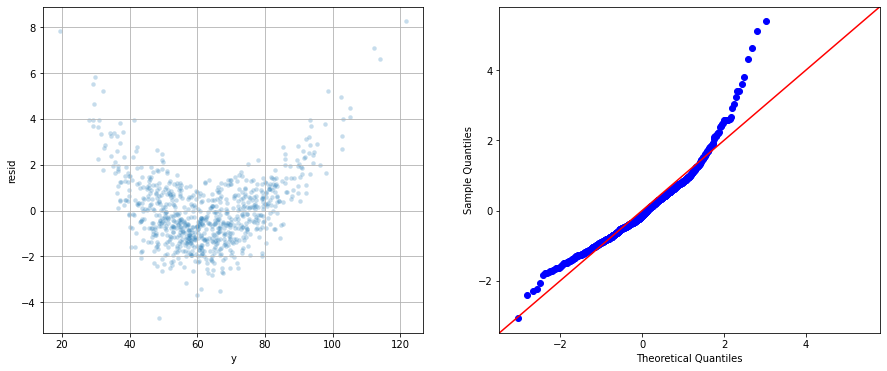

In [270]:
e = np.random.normal(0, 1, 1000)
x1 = np.random.normal(6, 1, 1000)
y = 2 + 3*x1 + 1.5*x1**1.85 + e

X_train, y_train, model, fitted = train_xy(x1, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

In [271]:
data = np.concatenate((np.reshape(x1, (-1, 1)), np.reshape(y, (-1, 1))), axis=1)
np.savetxt("ds_4.csv", data, delimiter=",")

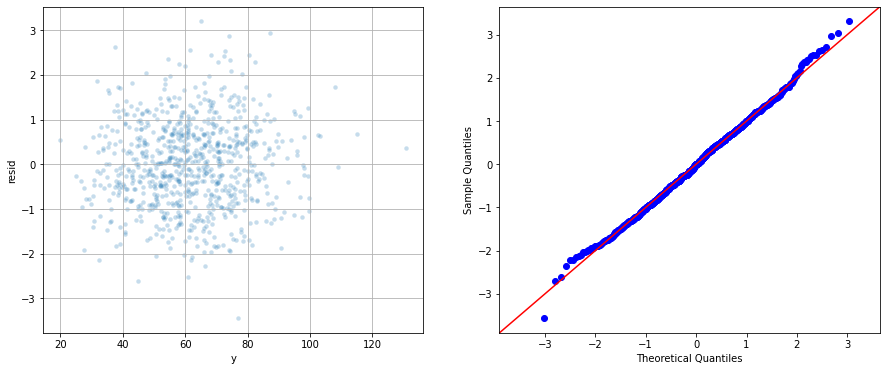

In [57]:
x = np.reshape(x1, (-1, 1))
X = np.concatenate((x,x**2), axis=1)

X_train, y_train, model, fitted = train_xy(X, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

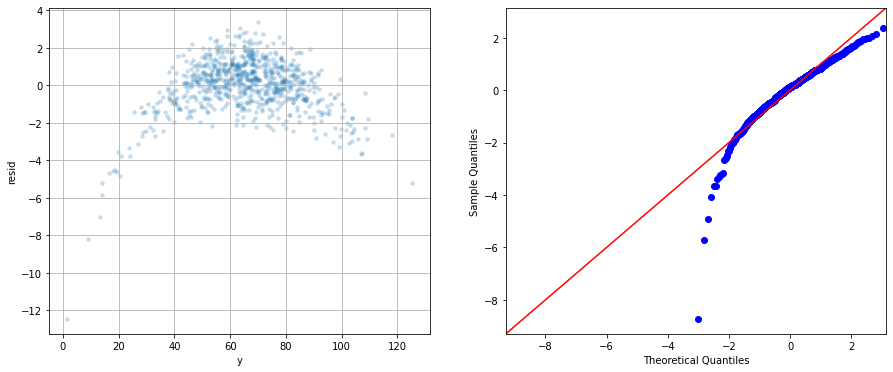

In [267]:
e = np.random.normal(0, 1, 1000)
x1 = np.random.normal(3, 1, 1000)
x1[x1<0] = 0
y = 1.2 + 8.4*x1 + 19.7*x1**0.65 + e

X_train, y_train, model, fitted = train_xy(x1, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

In [268]:
data = np.concatenate((np.reshape(x1, (-1, 1)), np.reshape(y, (-1, 1))), axis=1)
np.savetxt("ds_3.csv", data, delimiter=",")

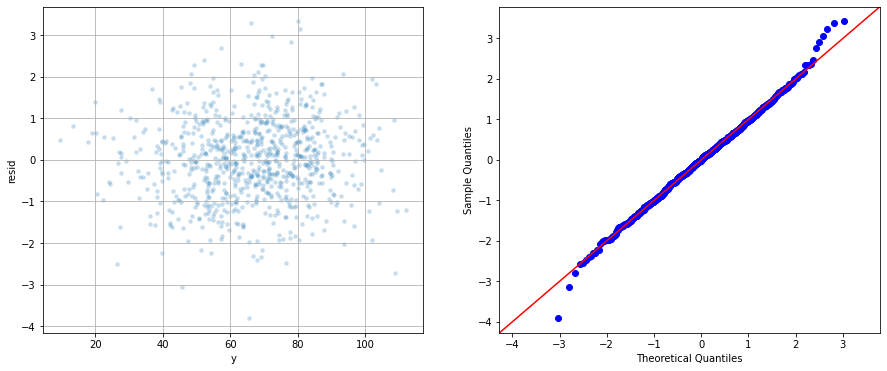

In [112]:
x = np.reshape(x1, (-1, 1))
X = np.concatenate((x,x**0.5), axis=1)
X_train, y_train, model, fitted = train_xy(X, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

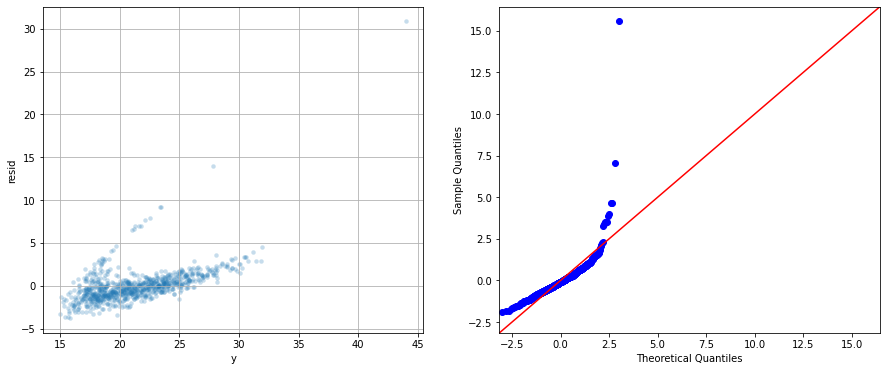

In [262]:
e = np.random.normal(0, 1, 1000)
x1 = np.random.normal(3, 1, 1000)
x1[x1<0] = 1
y = 1.2 + 5*x1 + 12.5*(1/x1) + e

X_train, y_train, model, fitted = train_xy(x1, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

In [263]:
data = np.concatenate((np.reshape(x1, (-1, 1)), np.reshape(y, (-1, 1))), axis=1)
np.savetxt("ds_2.csv", data, delimiter=",")

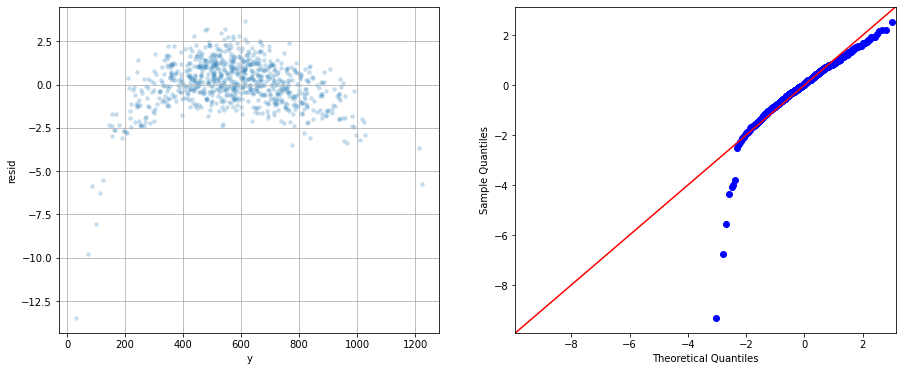

In [261]:
e = np.random.normal(0, 1, 1000)
x1 = np.random.normal(3, 1, 1000)
x1[x1==0] = np.random.uniform(1,5)

y = 1.2 - 6.34*np.log(x1) + e


X_train, y_train, model, fitted = train_xy(x1, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

In [250]:
data = np.concatenate((np.reshape(x1, (-1, 1)), np.reshape(y, (-1, 1))), axis=1)
np.savetxt("ds_1.csv", data, delimiter=",")

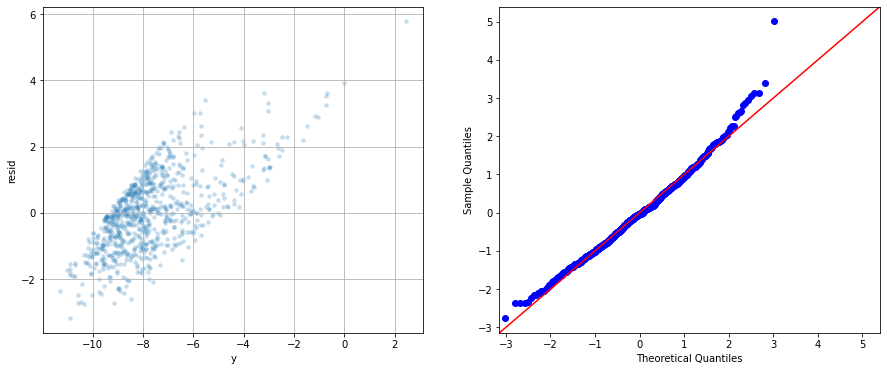

In [352]:
e = np.random.normal(0, 1, 1000)
x1 = np.random.beta(1, 3, 1000)
l = 2.98
x1_bx = (x1**l -1)/l
y = 2 + 2.3*x1 + 32.2*x1_bx + e

X_train, y_train, model, fitted = train_xy(x1, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 2, figsize=(15,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])

(array([ 1.,  0.,  4.,  3.,  6.,  5., 10., 13., 18., 26., 32., 34., 42.,
        37., 43., 38., 50., 66., 66., 38., 36., 41., 40., 28., 25., 23.,
        12., 14.,  9., 14.,  7.,  2.,  4.,  1.,  4.,  1.,  2.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.17805125, -2.99882015, -2.81958905, -2.64035795, -2.46112685,
        -2.28189575, -2.10266465, -1.92343355, -1.74420245, -1.56497135,
        -1.38574025, -1.20650915, -1.02727805, -0.84804695, -0.66881585,
        -0.48958475, -0.31035365, -0.13112255,  0.04810855,  0.22733965,
         0.40657075,  0.58580185,  0.76503295,  0.94426406,  1.12349516,
         1.30272626,  1.48195736,  1.66118846,  1.84041956,  2.01965066,
         2.19888176,  2.37811286,  2.55734396,  2.73657506,  2.91580616,
         3.09503726,  3.27426836,  3.45349946,  3.63273056,  3.81196166,
         3.99119276,  4.17042386,  4.34965496,  4.52888606,  4.70811716,
         4.88734826,  5.06657936,  5.24581046,  5.42504156,

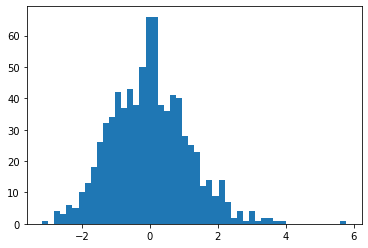

In [353]:
plt.hist(residuals, bins=50)

In [326]:
data = np.concatenate((np.reshape(x1, (-1, 1)), np.reshape(y, (-1, 1))), axis=1)
np.savetxt("ds_5.csv", data, delimiter=",")

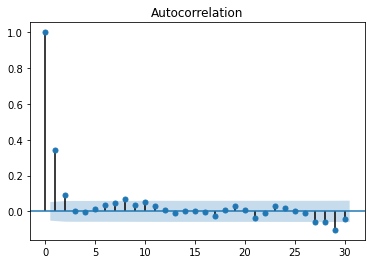

In [382]:
import numpy as np

def sample_signal(n_samples, corr, mu=0, sigma=1):
    assert 0 < corr < 1, "Auto-correlation must be between 0 and 1"

    # Find out the offset `c` and the std of the white noise `sigma_e`
    # that produce a signal with the desired mean and variance.
    # See https://en.wikipedia.org/wiki/Autoregressive_model
    # under section "Example: An AR(1) process".
    c = mu * (1 - corr)
    sigma_e = np.sqrt((sigma ** 2) * (1 - corr ** 2))

    # Sample the auto-regressive process.
    signal = [c + np.random.normal(0, sigma_e)]
    for _ in range(1, n_samples):
        signal.append(c + corr * signal[-1] + np.random.normal(0, sigma_e))

    return np.array(signal)

x1 = sample_signal(1000, 0.3, mu=0, sigma=1)
ftmp = sg.tsaplots.plot_acf(x1, alpha=0.1)


In [433]:
n = 1000
u = np.random.normal(0, 0.5, n)
e = np.random.normal(0, 1, n)
x = np.random.normal(5, 2.3, n)

#x_lagged = [x[0]]
#for i in range(1,n): 
#  x_lagged.append(0.78*x[i-1] + u[i])

x_lagged = x[1:] + u[1:]
x_lagged = np.append(x_lagged, np.mean(x_lagged) + u[3])

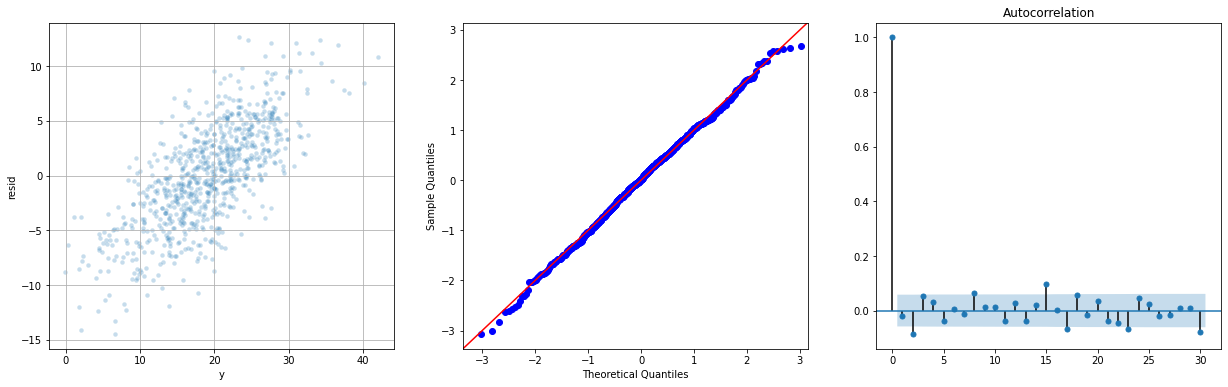

In [435]:
y = -1 + 2*x + 2*x_lagged + e

#X = np.concatenate((np.reshape(x[0:-1], (-1, 1)), np.reshape(x[1:], (-1, 1))), axis=1)
X_train, y_train, model, fitted = train_xy(x, y)
residuals = y_train - fitted

_, axs = plt.subplots(1, 3, figsize=(21,6))
plot_x_vs_y(y_train, residuals, "y", "resid",  ax=axs[0])
fig = sm.qqplot(residuals / np.std(residuals), line="45", ax=axs[1])
ftmp = sg.tsaplots.plot_acf(residuals, ax=axs[2], alpha=0.1)